> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigating and Visualizing No-Show appointments data set 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#hipertension is written in a wrong way so i am going to correct it
# also changing the no-shown so that  i dont get the attribute error
df=pd.read_csv('NSA.csv')
df.rename(columns={"No-show":"notshown"},inplace=True)
df.rename(columns={"hipertension":"hypertension"},inplace=True)

df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,notshown
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
#checking if there is duplicated files
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
notshown          110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# There is no missing values 

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# there is a min age of -1 and that must have been a mistake so i have to clean it 


In [10]:
ages=df.query('Age=="-1"')
ages

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,notshown
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
# these 1 line won't affect the data but i will clean it 
df.drop(index=99832 , inplace=True)

In [12]:
#lets check if its cleaned and the age is now correct
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
#okay now the age is fine

In [14]:
#checking if there is duplicated ids
df['PatientId'].duplicated().sum()

48228

In [ ]:
#checking  for duplicated ids but to see if them are going to show or not
df.duplicated(['PatientId','notshown']).sum()

In [16]:
#since that there are 38710 duplicated ids with the same no-show  status , so these ids must be cleaned
df.drop_duplicates(['PatientId','notshown'],inplace=True)
df.shape

(71816, 14)

# Data Wrangling I Made
I removed the proplem in the min of age 
removed the duplicates
renamed some columns so that i can adjust my work in a better way



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [17]:
# I am going to remove the unneeded information 
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay' ], axis = 1, inplace=True )
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,notshown
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Cleaning I Made
I dropped the unwanted information which won't help me in my analysis process.



## Exploratory Data Analysis




### Research Question 1 (Visualizing  all the data as histograms)

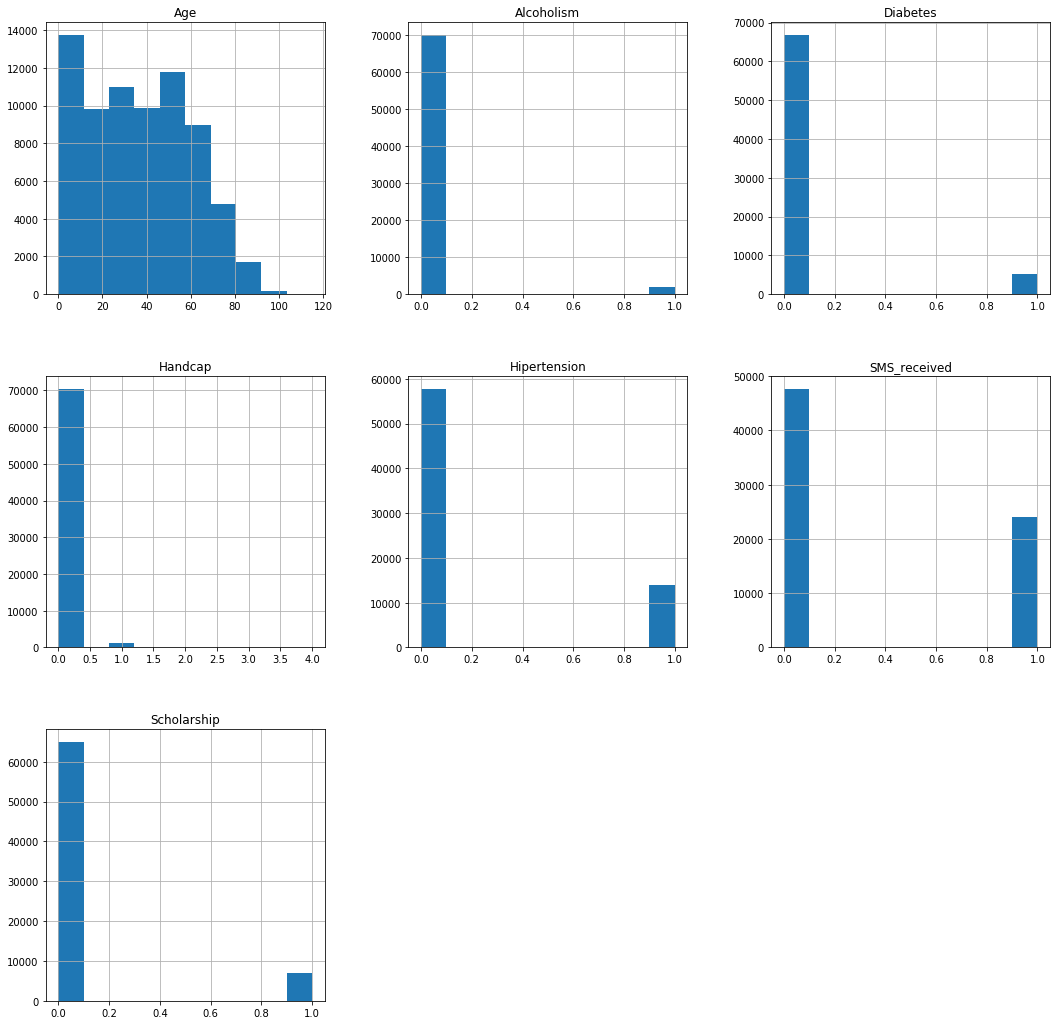

In [18]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize= (18,18));

# Most of people doesn't suffer from  diabetes and most  of them doesn't drink alocohol but about approximately 20% suffers from hipertension
# patients who received an SMS is nearly about 50 % of people who didn't received an SMS
# about 10000 only have a scholarship 



# I will divide the patients into two groups to differentiate between people who shown versus people who didn't show


In [19]:
shown = df.notshown == "No"
not_shown= df.notshown == "Yes"


In [20]:
df[shown].count()


Gender           54153
Age              54153
Neighbourhood    54153
Scholarship      54153
Hipertension     54153
Diabetes         54153
Alcoholism       54153
Handcap          54153
SMS_received     54153
notshown         54153
dtype: int64

In [21]:
df[not_shown].count()

Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hipertension     17663
Diabetes         17663
Alcoholism       17663
Handcap          17663
SMS_received     17663
notshown         17663
dtype: int64

# people who shown is about 3 times the people who didn't show


In [22]:
#finding the average of the shown versus not shown

df[shown].mean()
df[not_shown].mean()

Age             34.376267
Scholarship      0.108419
Hipertension     0.170922
Diabetes         0.065108
Alcoholism       0.029440
Handcap          0.017777
SMS_received     0.453094
dtype: float64

 there is alot of patients that received the sms didn't show for the appointment and people so the sms sending needs more attention.


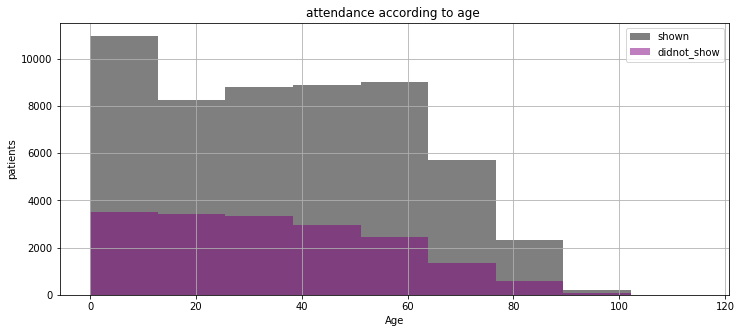

In [24]:
#seeing if the age of the patients affect them being shown or not
def attendance (df,col_name,shown,not_shown):
    plt.figure(figsize=[12,5])
    df[col_name][shown].hist(alpha=.5,bins=9,color="black",label="shown")
    df[col_name][not_shown].hist(alpha=.5,bins=9,color="purple",label='didnot_show')
    plt.legend();
    plt.title('attendance according to age ')
    plt.xlabel('Age')
    plt.ylabel('patients');
attendance(df,'Age',shown,not_shown)

ages from 0-10 has  the highest rate of attendance that means the parents take care of their kids.
it's approximately the same rate of attendance from age 30 to nearly 63 
as the age increase more than about 63 the   rate of attendance decrease till 0 at the age  of approximately 105.

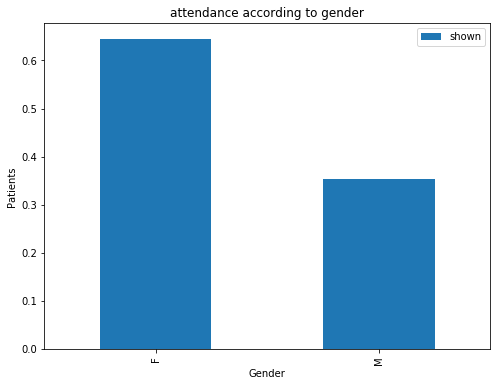

In [26]:
# analyzing if the gender affects the attendance 
def attendance(df,col_name,shown,not_shown):
    plt.figure(figsize=[8,6])
    df[col_name][shown].value_counts(normalize=True).plot(kind='bar',label="shown")
    plt.legend();
    plt.title('attendance according to gender')
    plt.xlabel('Gender')
    plt.ylabel('Patients')
attendance(df,'Gender',shown,not_shown)

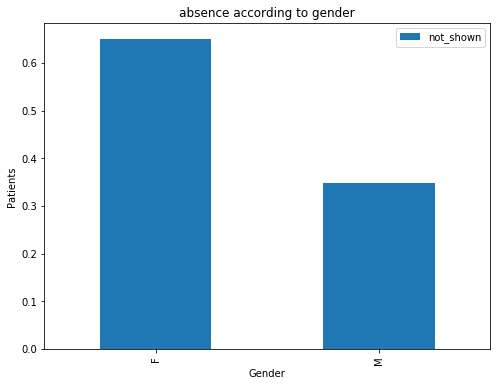

In [27]:
def attendance(df,col_name,shown,not_shown):
    plt.figure(figsize=[8,6])
    df[col_name][not_shown].value_counts(normalize=True).plot(kind='bar',label="not_shown")
    plt.legend();
    plt.title('absence according to gender')
    plt.xlabel('Gender')
    plt.ylabel('Patients')
attendance(df,'Gender',shown,not_shown)

 the number of attendance and absence is approxiamtely the same so the gender doesn't affect the attendance

Text(0,0.5,'Patients')

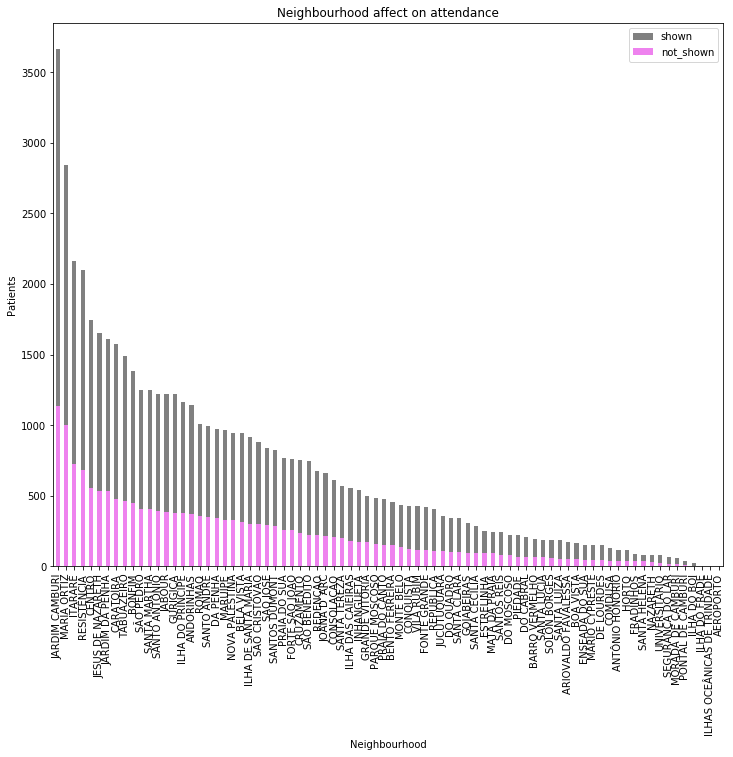

In [41]:
# seeing if the Neighbourhood affects the attendance
plt.figure(figsize=[12,10])
df.Neighbourhood[shown].value_counts().plot(kind='bar',color='grey',label='shown')
df.Neighbourhood[not_shown].value_counts().plot(kind='bar',color='violet',label='not_shown')
plt.legend()
plt.title('Neighbourhood affect on attendance')
plt.xlabel("Neighbourhood")
plt.ylabel('Patients')


the Neighbourhood affects the attendance of the patients

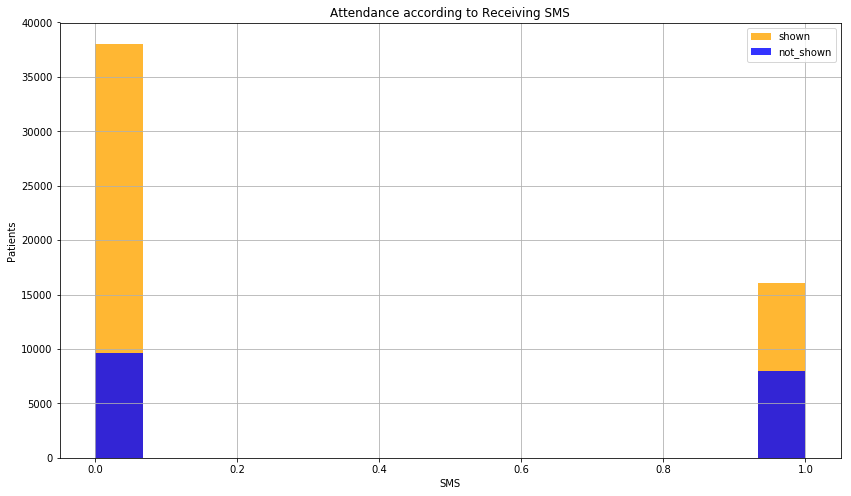

In [45]:
#seeing if the proplems in SMS Messages affect the attendance of patients
def attendance(df,col_name,shown,not_shown):
    plt.figure(figsize=[14,8])
    df[col_name][shown].hist(alpha=.8,bins=15,color="orange",label="shown")
    df[col_name][not_shown].hist(alpha=.8,bins=15,color="blue",label="not_shown")
    plt.legend();
    plt.title('Attendance according to Receiving SMS')
    plt.xlabel("SMS")
    plt.ylabel("Patients")
attendance(df,"SMS_received",shown,not_shown)

Patients who received an SMS half of them approximately attended to the appointment but  the patients who didn't receive an SMS and attended to the appointment are more than who didn't receive and not attended

<a id='conclusions'></a>
## Conclusions

I analyzed the attendance of patients to the appointment according to their age firstly
Then I analyzed their attendance according to the gender  but the gender didn't has any effect on the attendance of patients
I also analyzed the attendance according to the patient's neighbourhood and it had a little big  effect on the attendance
Lastly I analyzed the attendance according to the received SMS and YES  the SMS Sending needs more attention 




### Limitations
the "no show" was a limitation at the begining as no for the patients who showed and yes for the patients who didn't show 
also there is no direct correlation between patients who shown and the patients who didn't show and gender , diseases and scholarship
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0